In [1]:
pip install google-generativeai -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show google-generativeai

Name: google-generativeai
Version: 0.8.5
Summary: Google Generative AI High level API client library and tools.
Home-page: https://github.com/google/generative-ai-python
Author: Google LLC
Author-email: googleapis-packages@google.com
License: Apache 2.0
Location: c:\Users\prach\anaconda3\Lib\site-packages
Requires: google-ai-generativelanguage, google-api-core, google-api-python-client, google-auth, protobuf, pydantic, tqdm, typing-extensions
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade google-generativeai

In [4]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [24]:
from dotenv import load_dotenv, find_dotenv
import os


#load_dotenv(find_dotenv(),override=True) ##returning false


load_dotenv(dotenv_path="../cred.env")

GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")



In [25]:
import google.generativeai as genai
import os


genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))


In [36]:
for model in genai.list_models():
    print(model.name)
    #print(model)

models/embedding-gecko-001
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash
models/gemini-2.5-flash-lite-preview-06-17
models/gemini-2.5-pro-preview-05-06
models/gemini-2.5-pro-preview-06-05
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/gemini-2.5-flash-preview-tts
models/gemini-2.5-pro-preview-tts
models/learnlm-2.0-flash-experimental
models/gemma-3-1b-it
models/gemma-3-4b-it
models/gemma-3-12b-it
models/gemma-3-27b-it
models/gemma-3n-e4b-it
mo

In [50]:
print(type(genai))

<class 'module'>


In [37]:
model = genai.GenerativeModel('models/gemini-2.0-flash')


response = model.generate_content("Explain A/B testing in terms of ML engineering in simpler words with examples")

In [ ]:
print(response)

In [42]:
model_info = genai.get_model('models/gemini-2.0-flash-thinking-exp')

print(model_info)

Model(name='models/gemini-2.0-flash-thinking-exp',
      base_model_id='',
      version='2.5-preview-05-20',
      display_name='Gemini 2.5 Flash Preview 05-20',
      description='Preview release (April 17th, 2025) of Gemini 2.5 Flash',
      input_token_limit=1048576,
      output_token_limit=65536,
      supported_generation_methods=['generateContent',
                                    'countTokens',
                                    'createCachedContent',
                                    'batchGenerateContent'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)


In [48]:
prompt = "When we have ML model is ready for testing and validation . How can we implement A/B testing in terms of ML engineering, provide examples/code snippet to illustrate"

response = model.generate_content(prompt, stream=True)

In [49]:
for chunk in response:
    print(chunk.text, end ='')
    #print('-'*50)

## Implementing A/B Testing for ML Models in ML Engineering

A/B testing (also known as split testing) in the context of machine learning involves comparing the performance of two or more different ML models or model configurations (e.g., different versions of the same model, different feature sets, different hyperparameters) on a subset of real-world data to determine which performs best based on pre-defined metrics.

Here's a breakdown of how to implement A/B testing in ML engineering:

**1. Defining the Experiment & Metrics**

*   **Hypothesis:**  Clearly define what you're testing and what you expect to happen. For example: "Model B (using a new feature) will increase conversion rate by 5% compared to Model A (baseline)."
*   **Models:** Identify the models you want to compare (A - control/baseline, B - variation, C, etc.).
*   **Target Metric(s):**  Choose the metrics that matter most to your business goal (e.g., click-through rate, conversion rate, revenue, prediction accuracy, c

## Generate text from Images

In [ ]:
##Python Imaging Library, PIL

pip install pillow

Note: you may need to restart the kernel to use updated packages.


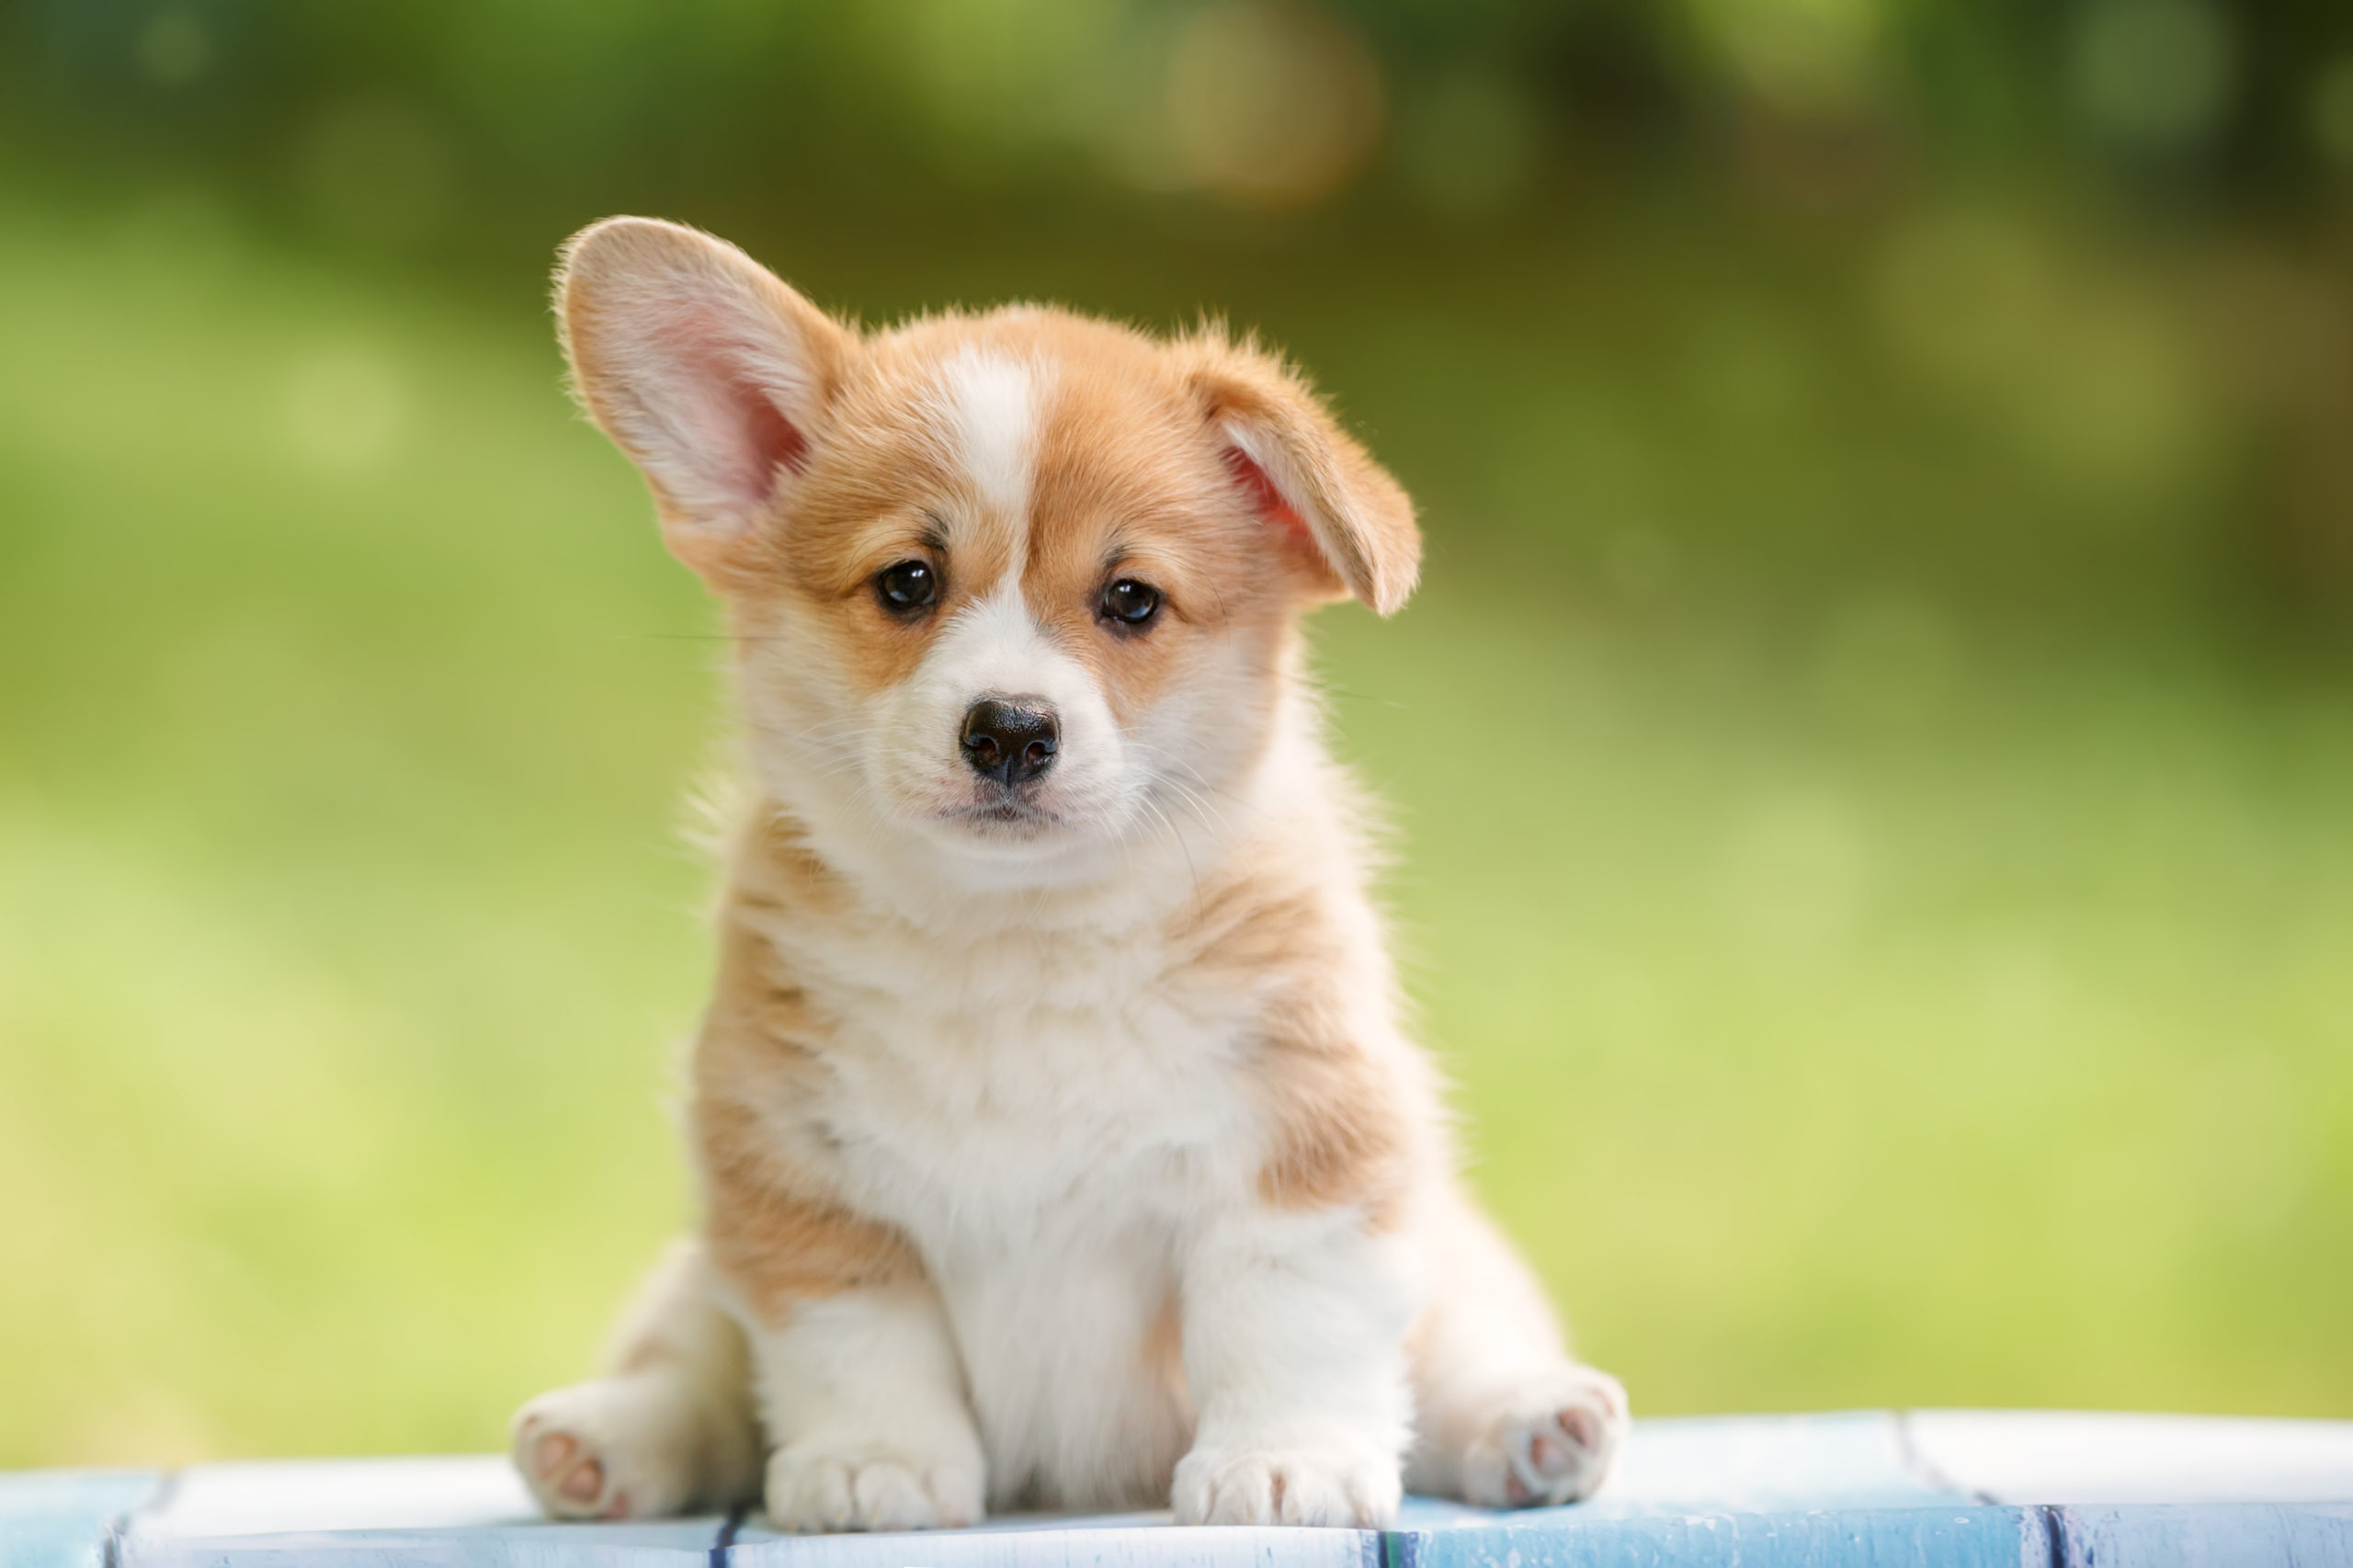

In [53]:
from PIL import Image

image = Image.open("pup.jpg")
image

In [ ]:


model = genai.GenerativeModel('models/gemini-2.0-flash')




In [59]:
text_prompt = "which breed is this dog"

response = model.generate_content([text_prompt, image])

print(response.text)

Based on the image, the dog appears to be a **Pembroke Welsh Corgi puppy**.



In [62]:
generate_config = genai.types.GenerationConfig(
    candidate_count=1,
    max_output_tokens=30000,
    temperature=0.9,
    top_k=1,
    top_p=0.9
)

model = genai.GenerativeModel('models/gemini-2.0-flash-thinking-exp')

response = model.generate_content([text_prompt, image], generation_config=generate_config)

print(response.text)

This adorable puppy is a **Pembroke Welsh Corgi**.

Key features that point to this breed are:
*   **Short legs and a relatively long body** (though less obvious in a sitting puppy picture, the proportions are there).
*   **Erect, somewhat large, triangular ears** (one is fully up, the other is still developing, which is common in corgi puppies).
*   **Fox-like facial features** with dark, expressive eyes and a black nose.
*   **Fluffy coat** with a distinctive **red/sable and white** coloring, including the common white blaze on the forehead and white chest/paws.


## builiding conversation model

In [63]:
import google.generativeai as genai
import os
from dotenv import load_dotenv

load_dotenv(dotenv_path="../cred.env")

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

In [70]:
model = genai.GenerativeModel('models/gemini-2.5-flash')

In [71]:
chat= model.start_chat(history=[])

chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-2.5-flash',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[]
)

In [72]:
response = chat.send_message("In one pragraph, explain what is machine learning to 10 year old kid")

In [74]:
chat.history[1]

parts {
  text: "Imagine teaching a computer to learn things all by itself, kind of like how you learn to ride a bike or recognize your friend\'s face. Instead of us telling the computer every single tiny step it needs to take, we show it lots and lots of examples. For instance, if we want a computer to tell the difference between a cat and a dog, we show it thousands of pictures of cats and dogs. After seeing all those examples, the computer starts to notice patterns all by itself, learning what makes a cat look like a cat and a dog look like a dog. Then, when you show it a brand new picture, it can guess whether it\'s a cat or a dog, and usually get it right! It\'s how computers get smarter and can do cool things like recommend videos you might like or help smart speakers understand what you say."
}
role: "model"

In [75]:
response = chat.send_message("okay, now explain what is model in machine learning")

In [79]:
chat.history[3].parts[0].text

'Building on that, imagine the computer has finished learning to tell cats from dogs. After it looks at all those pictures, it doesn\'t just forget everything; it builds a special set of "rules" or creates a "smart brain" inside itself, specifically for that one job. This "smart brain" or "rulebook" that the computer makes for itself, filled with all the patterns and knowledge it just learned, is what we call a **model**. It\'s like when you learn to ride a bike – the skill you gain in your brain to balance and pedal *is* your "bike-riding model." For the computer, its model is the learned knowledge it now has, which it uses to make predictions or decisions, like telling you if that new picture is a cat or a dog.'

In [ ]:
chat.history

In [83]:
for item in chat.history:
    print(f'{item.role.capitalize()}:{item.parts[0].text}')
    print('-' * 100)

User:In one pragraph, explain what is machine learning to 10 year old kid
----------------------------------------------------------------------------------------------------
Model:Imagine teaching a computer to learn things all by itself, kind of like how you learn to ride a bike or recognize your friend's face. Instead of us telling the computer every single tiny step it needs to take, we show it lots and lots of examples. For instance, if we want a computer to tell the difference between a cat and a dog, we show it thousands of pictures of cats and dogs. After seeing all those examples, the computer starts to notice patterns all by itself, learning what makes a cat look like a cat and a dog look like a dog. Then, when you show it a brand new picture, it can guess whether it's a cat or a dog, and usually get it right! It's how computers get smarter and can do cool things like recommend videos you might like or help smart speakers understand what you say.
-----------------------------

## building conversational agent using gemini

In [5]:
from dotenv import load_dotenv, find_dotenv
import os
import google.generativeai as genai


load_dotenv(dotenv_path="../cred.env")

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))



In [6]:
model = genai.GenerativeModel('models/gemini-2.0-flash')

In [ ]:
chat = model.start_chat(history=[])

while True:
    prompt = input("Your question:")
    if prompt.lower() not in ['q', 'quit', 'exit']:
        response = chat.send_message(prompt)
        print(f"ChatGPT: {response.parts[0].text}")
        print('='*35)
    else:
        break

# prompt = input("Your question:")
# if prompt.lower() in ['q', 'quit', 'exit']:
#     break
# else:
#     response = chat.send_message(prompt)
#     print(f"ChatGPT: {response.parts[0].text}")


: 

In [91]:
response = chat.send_message("In simple words explain minfulness ")

In [93]:
response.parts[0].text

"Mindfulness is like paying close attention to what's happening right now, without judging it. It's about noticing your thoughts, feelings, and sensations in your body without getting carried away by them. Think of it like being a calm observer of your own experience in the present moment.\n"

## Handling media files

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2609k  100 2609k    0     0  3820k      0 --:--:-- --:--:-- --:--:-- 3832k


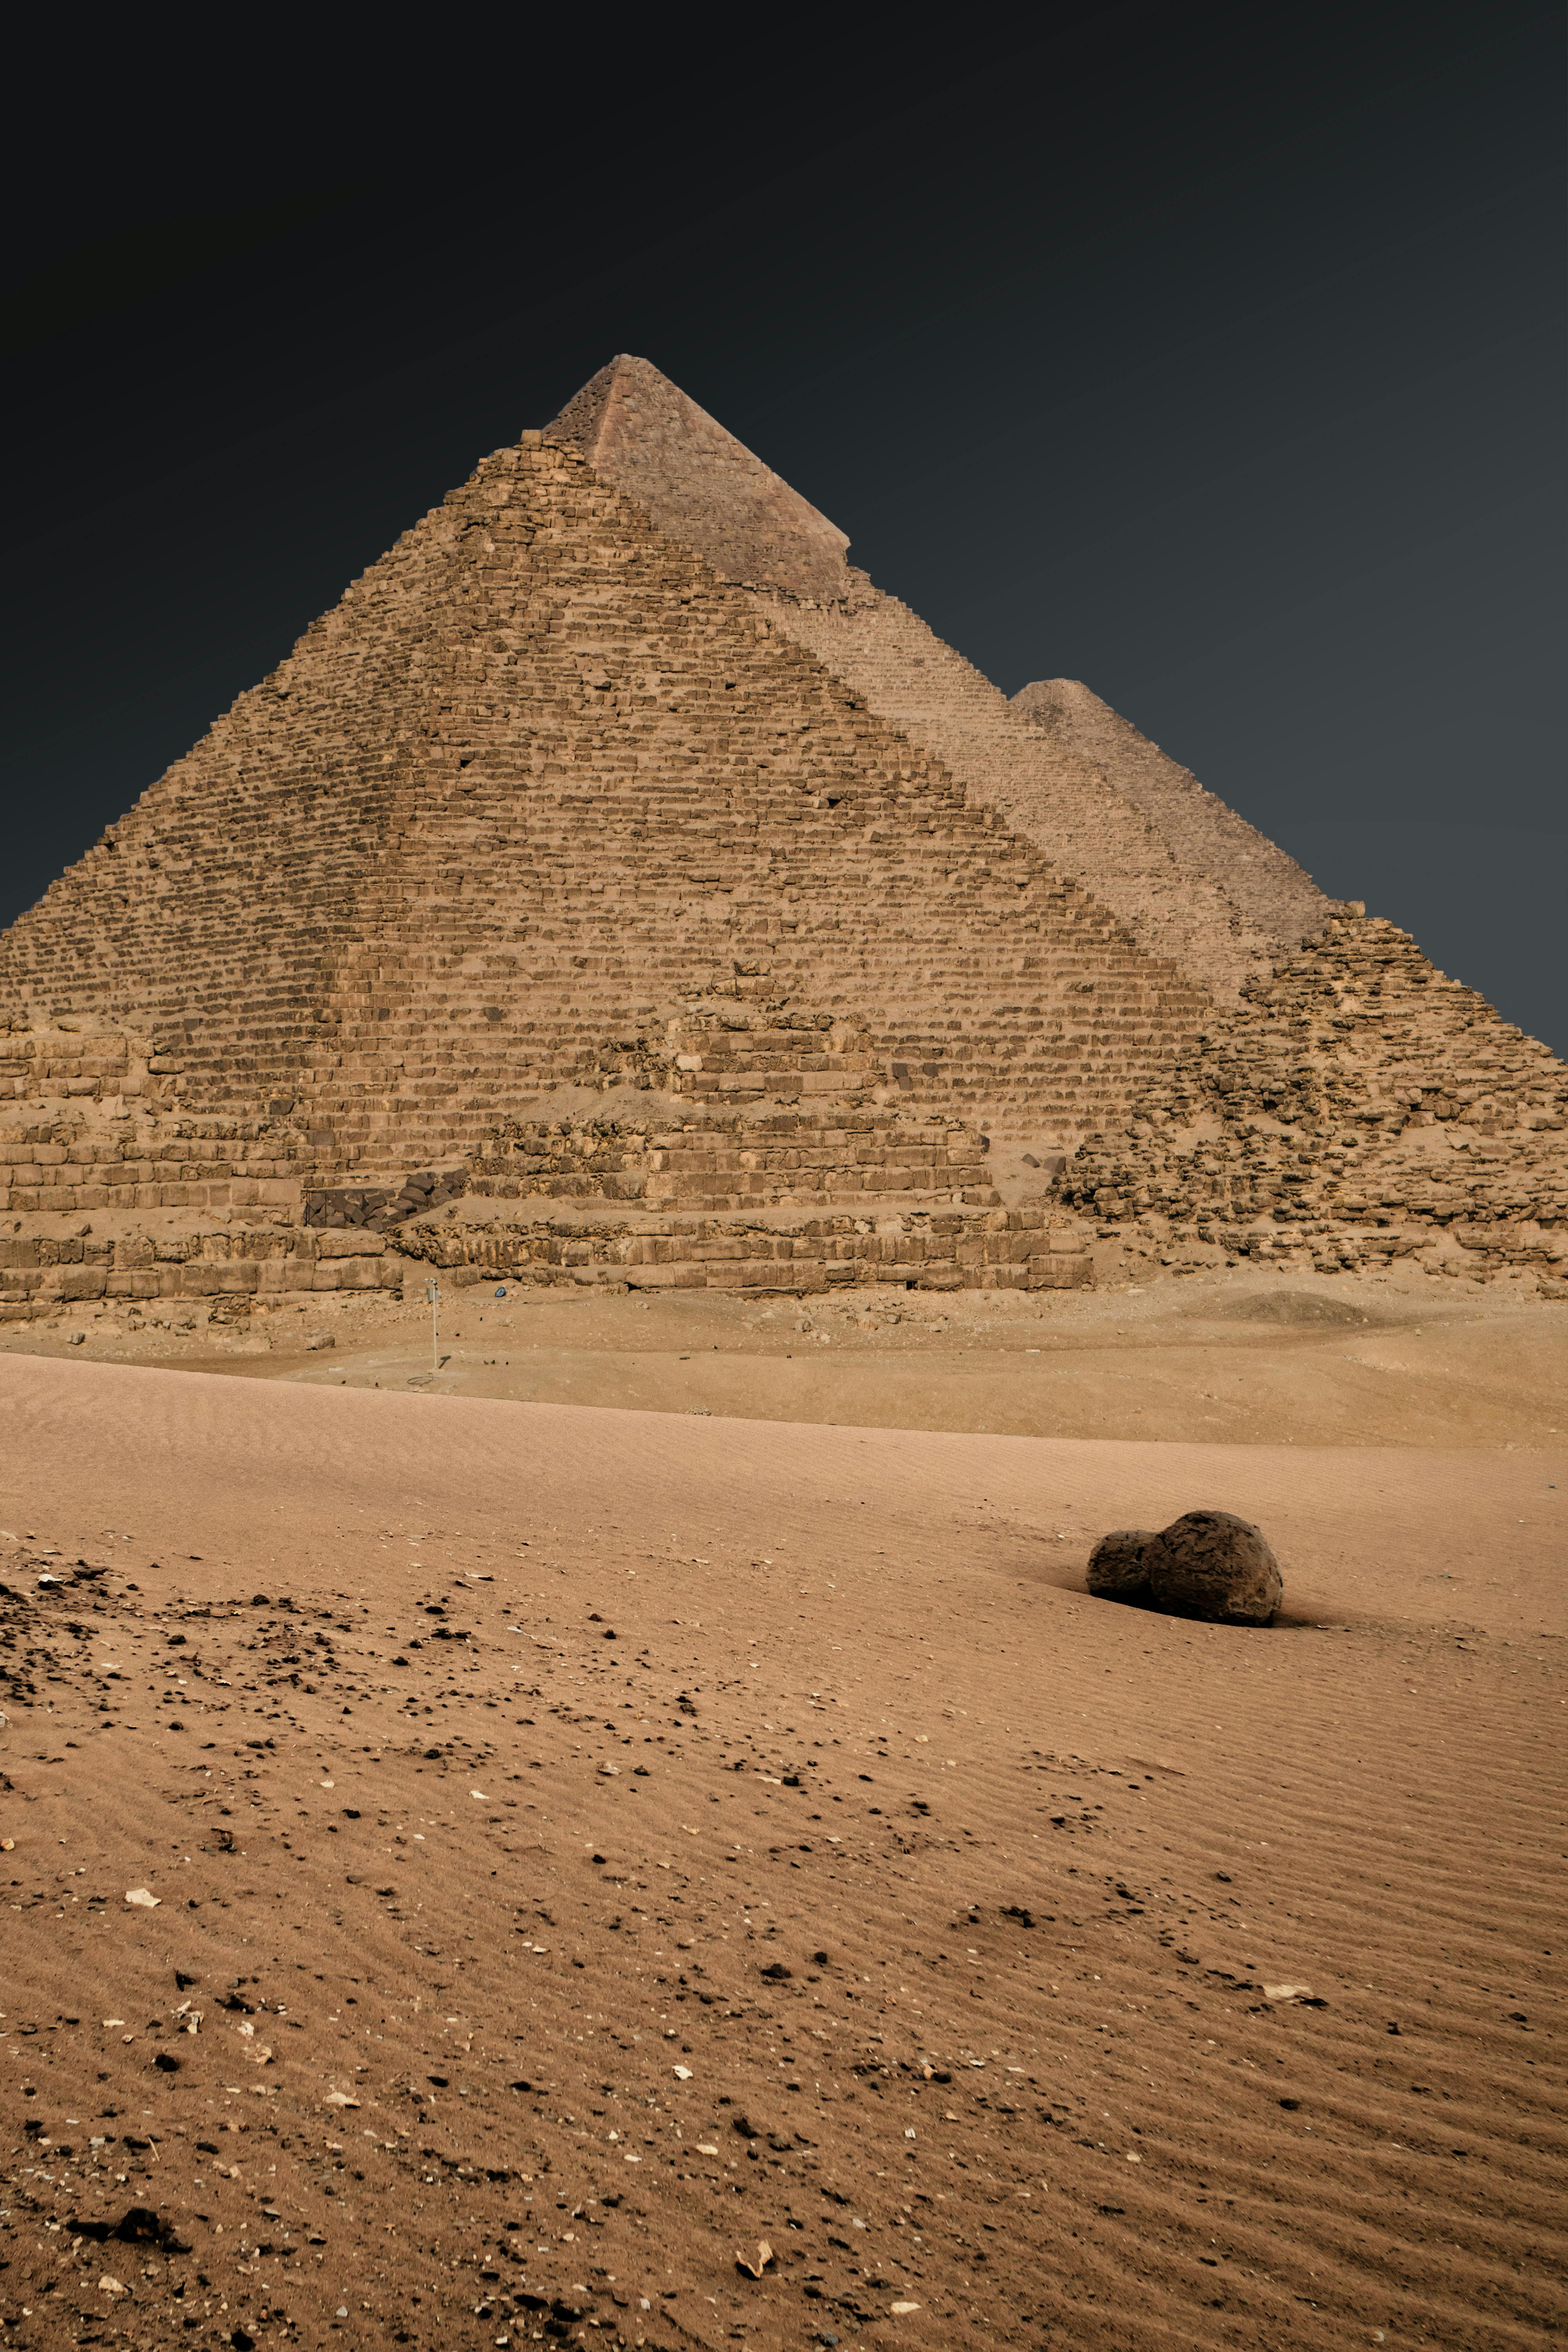

In [35]:
#download files from internet

!curl -o pyramid.jpg https://images.pexels.com/photos/34446917/pexels-photo-34446917.jpeg


from IPython.display import Image, Markdown
Image(filename='pyramid.jpg')

In [36]:
image_file = genai.upload_file(path='pyramid.jpg', display_name='pyramid.jpg')


In [37]:
file = genai.get_file(name=image_file.name)
print("Received file {file.uri} of size {file.display_name} bytes".format(file=file))



Received file https://generativelanguage.googleapis.com/v1beta/files/w9ypy7insn0t of size pyramid.jpg bytes


In [38]:
model = genai.GenerativeModel('models/gemini-2.0-flash-exp-image-generation')


total_tokens= model.count_tokens([file])
print(total_tokens)

response = model.generate_content(['Describe the image',file])

print(response.text)

total_tokens: 258

The image features three ancient pyramids standing tall against a dark, ominous sky. The pyramids, constructed from large, rectangular blocks of stone, dominate the upper portion of the frame. Their weathered surfaces reveal layers of history, with visible cracks, missing stones, and uneven textures.

Below the pyramids, a vast desert landscape stretches out, composed of sand in varying shades of brown. The foreground is marked by ripples and patterns in the sand, indicating the effects of wind and erosion. A solitary dark rock sits near the center of the image, providing a stark contrast to the surrounding sand.

The overall composition of the image evokes a sense of awe and wonder, highlighting the immense scale and timelessness of the pyramids within the barren yet captivating desert environment. The dark sky adds an element of drama and mystery to the scene, accentuating the stark beauty of the ancient structures and their surroundings.


In [24]:
print(f'{file.display_name}')

pyramid.jpg


In [ ]:
##delete file

genai.delete_file(name=file.name)

print(f"Deleted file {file.display_name}")

## Tokenization

In [33]:
import google.generativeai as genai

model_info = genai.get_model('models/gemini-2.5-pro')

print(type(model_info))

model_info.input_token_limit, model_info.output_token_limit

<class 'google.generativeai.types.model_types.Model'>


(1048576, 65536)

In [40]:
model = genai.GenerativeModel('models/gemini-2.5-pro')

img_file = genai.upload_file(path='london.jpg', display_name='London.jpg')

token_cnt = model.count_tokens([img_file])
print(token_cnt)


total_tokens: 258



In [ ]:
model.count_tokens(['Describe the image',img_file])p

total_tokens: 261